<a href="https://colab.research.google.com/github/dote7ant/KNN_and_Naive_Bayes_Classifications/blob/master/KNN_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying whether a passenger survives or not using K-Nearest Neighbours.

## Introduction

This is notebook is used to analyze the titanic dataset. We have worked with it in previous modules thus we are familiar with it.

###a. Defining the question

Given the datasets perform train and test splitting to the dataset and use this to determine whether a passenger survives or otherwise. You should perform a random test size in the splitting twice. The classification should be done by knn classifier.

We will use this models:
* Kneighboursclassifier
* randomforestclassifier( challenging the solution)

###b. Defining the metrics of success

For this project to be successful we should aim to do the following:
1. Find the parameters that determine whether a passenger survives or not.
2. An accuracy score of 0.9 or higher, though 0.8 can be accepted.
3. From the performances of the models we will draw conclusions and offer recommendations.
4. We will also use confusion matrix and classification report to rate the performances of the models.

###c. Understanding the context

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City.

The data represents the passenger information of those that were onboard the titanic. 

###d. Recording the experimental design

The following are the steps that we will take to conduct this project. They are listed below:


1. loading the required libraries
2. loading the data set
3. check the data
4. data preparation
5. validate the data
6. performing Exploratory Data Analysis (EDA) 
7. fit the data 
8. train the models
9. make predictions using the various models
10. evaluate the performance of the models
11. draw conclusions
12. make recommendations



## 1. Reading the data and importing all the required libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# import the data sets
# urls to hold the links to the data set
url = "https://archive.org/download/train5_202002/train%20%285%29.csv"
url1 = "https://archive.org/download/test1_202002/test%20%281%29.csv"

# read the data sets and create data frames
df_tr = pd.read_csv(url)
df_te = pd.read_csv(url1)

In [3]:
# preview the training data set
df_tr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# preview the test data set
df_te

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


What do we see? 

From the tables we can see a number of NaN in the data sets. In the test data set we have 11 rows where there is no survived column. We will use this data set to make predictions whether a passenger survived or not after we have created our model. 

For the training data set we will split it into training and test data.

## 2. Check the data 

#### data set 1 (training)

In [5]:
# look at the columns 
df_tr.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

We observe that the columns are start with a capital letter we will change this to the same case.

In [6]:
# preview the first 5 rows
df_tr.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# preview the last 5 rows
df_tr.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
# check the column data types 
print("The data types in our data set for various columns is as shown below:\n")
df_tr.info()
print("-----------------------------------------------------------------------")

The data types in our data set for various columns is as shown below:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
-----------------------------------------------------------------------


We observe that there are 891 rows of data but age, cabin, embarked have some nulls. The data types are int, objects and floats.

In [9]:
# check the data types
df_tr.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
# check number of rows and columns in the data set
print("There are", df_tr.shape[0], "rows and", df_tr.shape[1], "columns in our data set.")

There are 891 rows and 12 columns in our data set.


In [11]:
# check the unique values in the data set
for column in df_tr.columns:
  print("***************************", column, "********************************")
  print("This column has", df_tr[column].nunique(), "unique values, they are shown below:\n")
  print(df_tr[column].unique())
  print('________________________________________________________________________________________________\n')
  print('________________________________________________________________________________________________\n')

*************************** PassengerId ********************************
This column has 891 unique values, they are shown below:

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 2

Passenger ID and name are all unique there are no repeated values. Tickets and age have some repeated values. There are 681 values on the ticket column and 88 values in the age column. Parch and sibsp have 7 unique values. There are 2 sexes male and female. 3 unique values for pclass that is 3, 1 and 2. Survived has 2 unique values 0 and 1. Fare has 248 unique values, cabin 147 and embarked 3.

In [12]:
# we check for null values
df_tr.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age column has 177 missing values. Cabin has 687 missing values and embarked has 2. We will need to take care of this before doing any modelling.

In [13]:
# check for duplicates
print("There are duplicates in our data set:", df_tr.duplicated().any())

There are duplicates in our data set: False


There are no duplicate rows in our data set.

#### data set 2 (test)

In [14]:
# look at the columns 
df_te.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
# preview the first 5 rows
df_te.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
# preview the last 5 rows
df_te.tail(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


As observed earlier this data set does not have the survived column. 

In [17]:
# check the column data types 
print("The data types in our data set for various columns is as shown below:\n")
df_te.info()
print("-----------------------------------------------------------------------")

The data types in our data set for various columns is as shown below:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
-----------------------------------------------------------------------


There are 418 non null values in most of the columns. Age has 332, Fare has 417, Cabin has 91. This means there are missing values in this data set.

In [18]:
# check the data types
df_te.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

This data set has int, object and float data types.

In [19]:
# check number of rows and columns in the data set
print("There are", df_te.shape[0], "rows and", df_te.shape[1], "columns in our data set.")

There are 418 rows and 11 columns in our data set.


In [20]:
# check the unique values in the data set
for column in df_te.columns:
  print("***************************", column, "********************************")
  print("This column has", df_te[column].nunique(), "unique values, they are shown below:\n")
  print(df_te[column].unique())
  print('________________________________________________________________________________________________\n')
  print('________________________________________________________________________________________________\n')

*************************** PassengerId ********************************
This column has 418 unique values, they are shown below:

[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1

Names and passenger ID are all unique values. The Pclass column has only 3 unique values that is 3,2 and 1. There are 2 sexes male and female. 79 unique ages. Sibsp and parch have 7 and 8 unique values respectively.There are 369 unique values for ticket, 169 for fare 76 for cabin and 3 for embarked.

In [21]:
# we check for null values
df_te.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Age has 86 missing values, Fare has 1 and Cabin has 327. We will need to take care of this before modelling.

In [22]:
# check for duplicates
print("There are duplicates in our data set:", df_te.duplicated().any())

There are duplicates in our data set: False


What do we observe from both data sets? In the training data parch has 7 unique values that is (0-6) and in the test data parch has 8 that is (0-7).

Pclass, sex, Sibsp, parch and embarked need to be categorical.

##3. Tidying up the data 

We will start by dropping the cabin column since there is no logical way of imputing data to this column and there are very many missing values.

#### data set 1 (training)

In [23]:
# drop the cabin column
df_tr.drop(columns = 'Cabin', inplace =True)
# confirm drop was successful
df_tr.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [24]:
# change the data types for  age to integer

# list of columns we will convert to categorical 
#cat = ['Embarked','Sex']
#for column in cat:
 # df_tr[column] = df_tr[column].astype('category')

# confirm if the change was successful
df_tr.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [25]:
# deal with null values in the Embarked column
df_tr = df_tr.dropna(subset=['Embarked'])

In [26]:
# confirm Embarked column has no missing values
df_tr.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [27]:
# deal with missing values in the age column
m = df_tr['Age'].mean()
df_tr['Age'].fillna(m, inplace = True) 

In [28]:
# confirm Age column has no missing values
df_tr.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [29]:
# finding outliers in the training data set
Q1 = df_tr.quantile(0.25)
Q3 = df_tr.quantile(0.75)
IQR = Q3 - Q1
a =(df_tr < (Q1 - 1.5 * IQR)) |(df_tr > (Q3 + 1.5 * IQR))
a

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False


In [30]:
# first we check which columns have outliers
b = a.any() == True
print("These are the columns with outliers:\n",b)

# if the value is False then that column does not have outliers otherwise it does.

These are the columns with outliers:
 Age             True
Embarked       False
Fare            True
Name           False
Parch           True
PassengerId    False
Pclass         False
Sex            False
SibSp           True
Survived       False
Ticket         False
dtype: bool


We will drop our outliers. 

In [31]:
# removing the outliers
clean_tr = df_tr[~((df_tr < (Q1 - 1.5 * IQR)) |(df_tr > (Q3 + 1.5 * IQR))).any(axis=1)]
clean_tr.shape

(577, 11)

We observe that the new shape of the data is 577 rows which we are comfortable with as KNN has high memory consumption as the data increases so does the memory consumption.

In [32]:
# convert the columns names to lower case 
clean_tr.columns = map(str.lower, clean_tr.columns)
clean_tr.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

We now convert to the correct data types.


In [33]:
# list of columns we will convert to categorical 
cat = ['sex', 'embarked']
for column in cat:
  clean_tr[column] = clean_tr[column].astype('category')

# confirm the change is successful
clean_tr.dtypes

passengerid       int64
survived          int64
pclass            int64
name             object
sex            category
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
embarked       category
dtype: object

After removing outliers we noticed that the parch data had only 0 so we decided to remove this column as it had the same information.

In [34]:
# remove parch column
clean_tr.drop(columns = 'parch', inplace = True)

#### data set 2 (test)

In [35]:
# drop the cabin column
df_te.drop(columns = 'Cabin', inplace =True)
# confirm drop was successful
df_te.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [36]:
pip install impyute

In [37]:
# imputing data
col = ['Age', 'Fare']

from impyute.imputation.cs import mice
train = df_te[col]
# start the MICE training
imputed_training = mice(train.values)

# concatenate our data that is now imputed with the old data set
df_new = pd.concat([df_te.drop(columns= col), pd.DataFrame(imputed_training, columns=col)], axis=1)

In [38]:
# find missing values
df_new.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
Age            0
Fare           0
dtype: int64

The data set has no more missing values.

In [39]:
# check for duplicates
print("There are duplicates in our data set:", df_te.duplicated().any())

There are duplicates in our data set: False


We will not test this data set for outliers as we will use it to teset our model.

In [40]:
# convert the columns names to lower case 
df_te.columns = map(str.lower, df_te.columns)
df_te.columns

Index(['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked'],
      dtype='object')

In [41]:
# list of columns we will convert to categorical 
cat = ['sex', 'embarked']
for column in cat:
  df_te[column] = df_te[column].astype('category')

# confirm the change is successful
df_te.dtypes

passengerid       int64
pclass            int64
name             object
sex            category
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
embarked       category
dtype: object

##4. Exploratory Data Analysis

####a. Univariate analysis

In [42]:
# make a copy of our data frame
eda = clean_tr.copy()

In [43]:
# find descriptive statistics for the data
eda.describe()

,passengerid,survived,pclass,age,sibsp,fare
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,450.590988,0.299827,2.502600,29.727334,0.199307,14.926356
std,259.568357,0.458579,0.733909,8.517108,0.445034,12.606521
min,1.000000,0.000000,1.000000,5.000000,0.000000,0.000000
25%,222.000000,0.000000,2.000000,24.000000,0.000000,7.775000
50%,455.000000,0.000000,3.000000,29.642093,0.000000,8.662500
75%,676.000000,1.000000,3.000000,32.500000,0.000000,15.850000
max,891.000000,1.000000,3.000000,54.000000,2.000000,61.175000


The mean age is at about 30 when rounded off at a max age and min age of 54 and 5 respectively.

The mean fare is about 15 "currencies" with a max and min fare of 61 and 0 respectively.

In [44]:
# find the skewness of the data 
eda.skew()

passengerid   -0.028495
survived       0.876051
pclass        -1.106396
age            0.656308
sibsp          2.139041
fare           1.994894
dtype: float64

Most of the columns exhibit positive skewness while pclass and passenger id have negative.

In [45]:
# find the kurtosis of the data 
eda.kurt()

passengerid   -1.210327
survived      -1.236833
pclass        -0.272443
age            0.531472
sibsp          3.899491
fare           3.478944
dtype: float64

We observe that passengerid, survived and pclass are platykurtic that is negative kurtosis while age, sibsp and fare are leptokurtic. How is it useful? It is a useful measure of whether there is a problem with outliers in a data set. Larger kurtosis indicates a more serious outlier problem, and may lead the researcher to choose alternative statistical methods. We observe that sibsp and fare have kurtosis of +3.90 and +3.50 respectively.

In [46]:
# find the variance of the data 
eda.var()

passengerid    67375.731724
survived           0.210295
pclass             0.538622
age               72.541126
sibsp              0.198055
fare             158.924368
dtype: float64

The variance of passenger id is very high but we are not worried about that as that is an identifier of the passenger and has no mathematical significance to us. Age and fare have relatively high variance compared to other columns thus there might be need to normalize our data.

##### Distributions

In [47]:
eda.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'ticket', 'fare', 'embarked'],
      dtype='object')

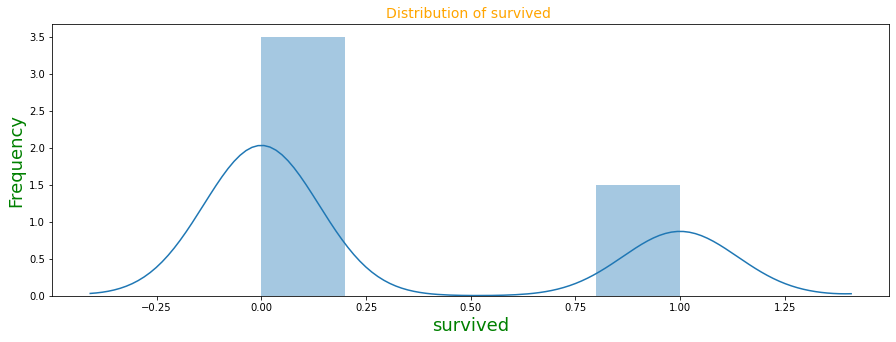

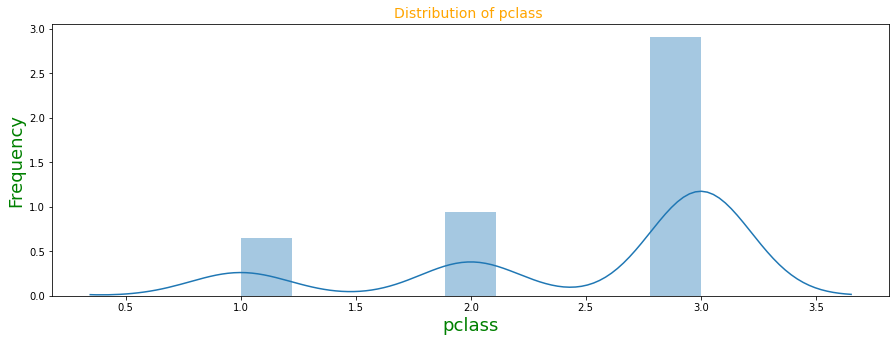

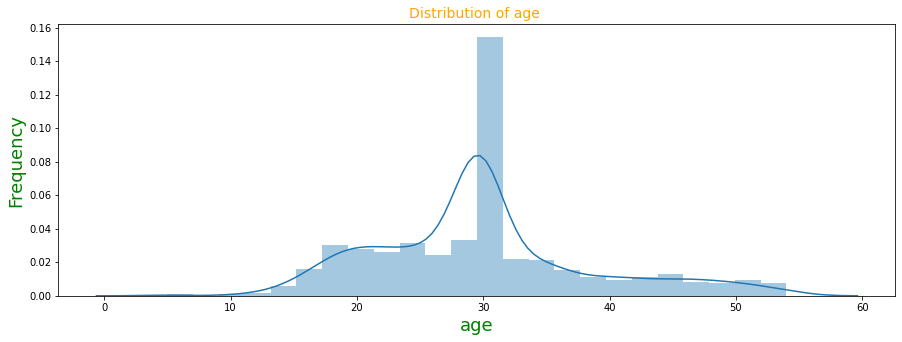

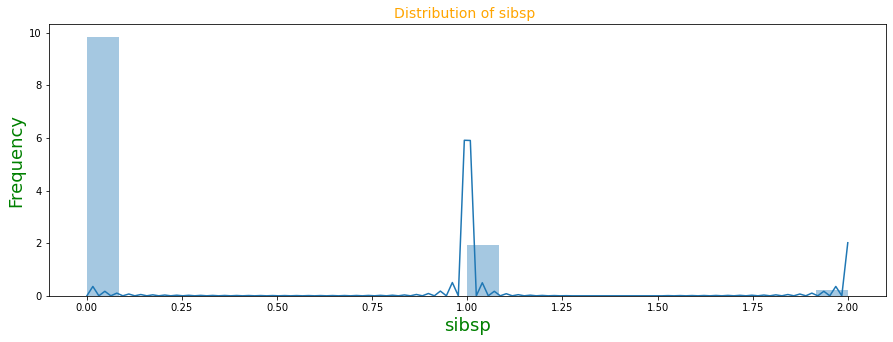

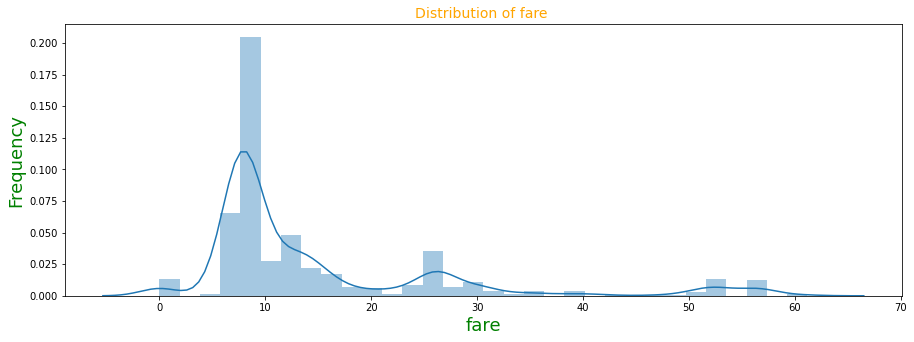

In [48]:
# get the numerical data 
nums = ['survived', 'pclass', 'age', 'sibsp', 'fare']

# loop to plot our distribution plots for our numerical data
for i in np.arange(0, 5, 1):
  plt.figure(figsize = (15, 5))
  sns.distplot(eda[nums[i]])
  plt.title(f'Distribution of {nums[i]} ', fontsize = 14, color = "orange")
  plt.xlabel(nums[i], fontsize = 18, color = 'green')
  plt.ylabel('Frequency', fontsize = 18, color = 'green')

In the plot for survived we see most people did not. Pclass has majority of the passengers at 3. Age distribution is almost normal with a fatter  tail on the right. For the fare most of the passengers paid a fair of about 10.

####b. Bivariate analysis

We will now encode our categorical columns 

##### countplots

In [49]:
# change categorical data to numerical 
le = LabelEncoder()
eda['sex'] = le.fit_transform(eda['sex'])
eda['embarked'] = le.fit_transform(eda['embarked'])
eda.head()

,passengerid,survived,pclass,name,sex,age,sibsp,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,A/5 21171,7.2500,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,373450,8.0500,2
5,6,0,3,"Moran, Mr. James",1,29.642093,0,330877,8.4583,1


In [50]:
# compare this to the other one above
clean_tr.head()

,passengerid,survived,pclass,name,sex,age,sibsp,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.642093,0,330877,8.4583,Q


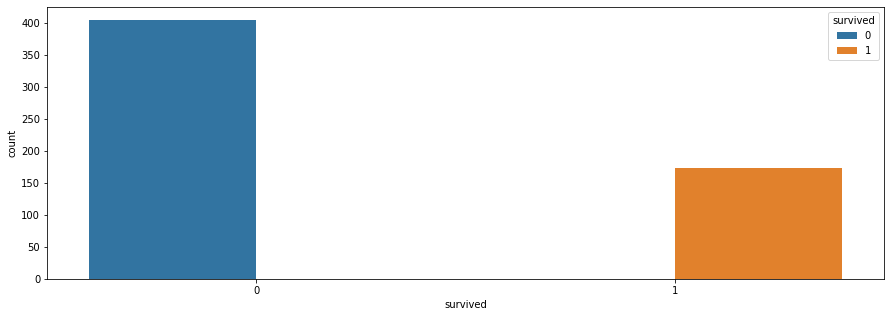

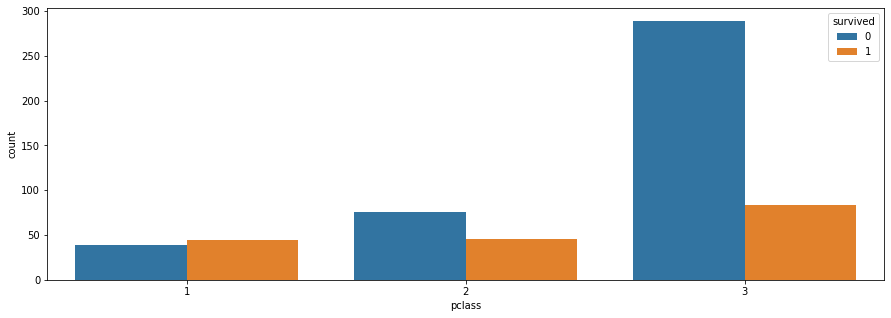

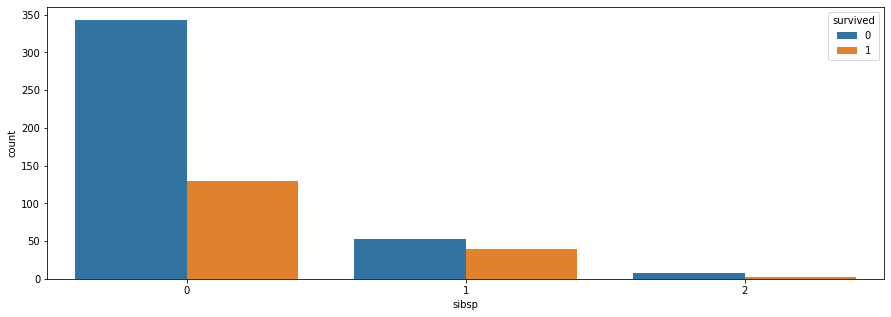

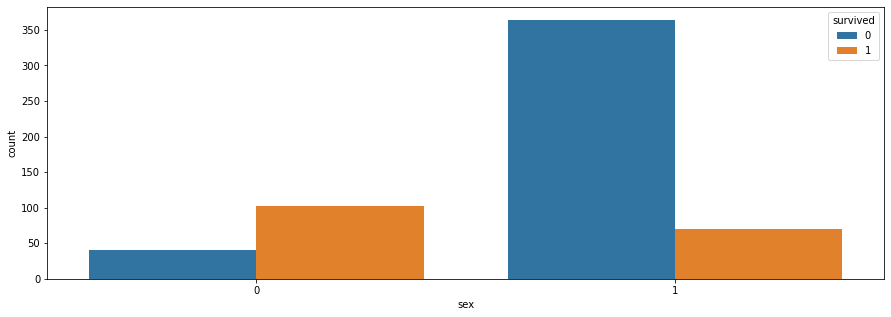

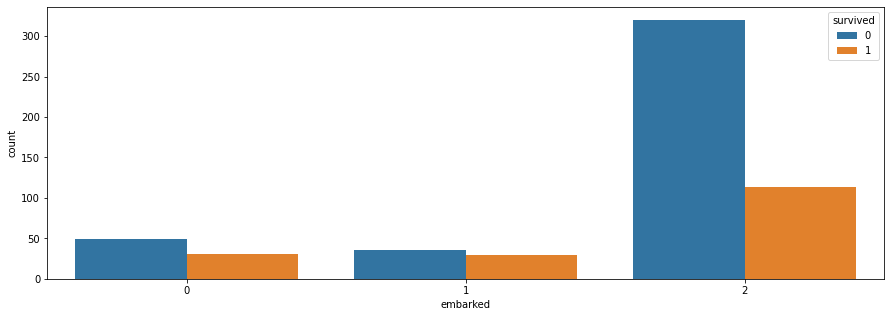

In [51]:
# find the countplots for the following columns
nums = ['survived', 'pclass', 'sibsp', 'sex', 'embarked']
for i in np.arange(0, 5, 1):
  f = plt.subplots(figsize=[15, 5])
  sns.countplot(eda[nums[i]], hue= 'survived', data=eda)

What are our observations?
1. Majority of the passengers did not survive
2. Majority of the passengers in 3 class did not survive while those at first class majority of them survived.
3. Majority of the men did not survive and majority of the women did survive.
4. Majority of those in S as embarked did not survive, for those in Q the numbers were almost equal.

##### Correlation

In [52]:
# find the correlation of the data 
corr = eda.corr()
corr

,passengerid,survived,pclass,sex,age,sibsp,fare,embarked
passengerid,1.000000,-0.050556,-0.054511,0.104019,0.045940,-0.102197,0.019040,0.032816
survived,-0.050556,1.000000,-0.242189,-0.526748,0.006666,0.097999,0.268890,-0.125676
pclass,-0.054511,-0.242189,1.000000,0.037617,-0.355313,-0.078664,-0.670942,-0.004670
sex,0.104019,-0.526748,0.037617,1.000000,0.079263,-0.185057,-0.070345,0.114607
age,0.045940,0.006666,-0.355313,0.079263,1.000000,0.024791,0.261262,0.063137
sibsp,-0.102197,0.097999,-0.078664,-0.185057,0.024791,1.000000,0.345588,-0.039957
fare,0.019040,0.268890,-0.670942,-0.070345,0.261262,0.345588,1.000000,-0.036550
embarked,0.032816,-0.125676,-0.004670,0.114607,0.063137,-0.039957,-0.036550,1.000000


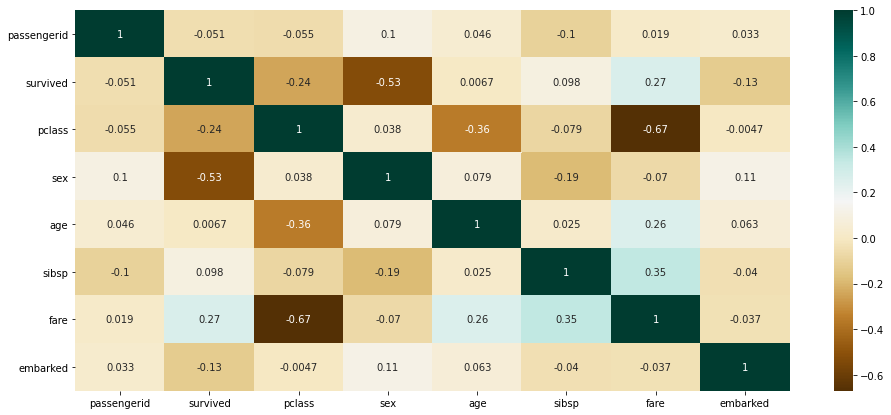

In [53]:
# plot a heat map for correlation
# plotting a heat map for the correlation
plt.figure(figsize = (16,7))
sns.heatmap(corr,xticklabels = corr.columns, yticklabels = corr.columns, annot=True, cmap='BrBG')

Correlation is the degree to which two pairs are linearly related.

Fare and pclass are highly negatively correlated at -0.67. Sex and survived come in second at -0.53. The positive correlations are not to high as the highest is 0.35 for sibsp and fare.

In [54]:
# find the VIF matrix
print("Below is our VIF matrix\n")
pd.DataFrame(np.linalg.inv(eda.corr().values), index = corr.index, columns=corr.columns)

Below is our VIF matrix



,passengerid,survived,pclass,sex,age,sibsp,fare,embarked
passengerid,1.023943,0.017002,0.042565,-0.078872,-0.018741,0.102630,-0.032291,-0.018124
survived,0.017002,1.536178,0.179880,0.785976,0.057083,0.112584,-0.287806,0.093640
pclass,0.042565,0.179880,2.059066,0.013027,0.380986,-0.322018,1.346522,0.041628
sex,-0.078872,0.785976,0.013027,1.467723,-0.072459,0.244188,-0.165448,-0.058499
age,-0.018741,0.057083,0.380986,-0.072459,1.163899,0.002612,-0.071579,-0.058124
sibsp,0.102630,0.112584,-0.322018,0.244188,0.002612,1.248667,-0.663064,0.006784
fare,-0.032291,-0.287806,1.346522,-0.165448,-0.071579,-0.663064,2.219453,0.049286
embarked,-0.018124,0.093640,0.041628,-0.058499,-0.058124,0.006784,0.049286,1.025004


There are no columns with a high VIF score thus there is no multicollinearity.

#### c. Multivariate analysis

We had removed outliers thus factor analysis, pca and lda can be used more so factor analysis can be used with ease. But we will use lda.

In [55]:
# function that takes in the independent and dependent variables together with the number of parametes we want to return.
def Factor(X, y, n, d):
 # divide data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

 # standardize our data before perfoming LDA
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

 # perform LDA 
 # here we will use one parameter 
  lda = LDA(n_components=n)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)

 # we have now got one parameter to use now we test the perfomance
  classifier = RandomForestClassifier(max_depth=d, random_state=0)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)

  #cm = confusion_matrix(y_test, y_pred)
  #print(cm)
  a = accuracy_score(y_test, y_pred)
  print('Accuracy: ' + str(a))
  def coe():
    # Create an LDA object
    lda = LDA(n_components = n)
    x = lda.fit(X, y)
    model = x.transform(X)
    coeff = pd.DataFrame(index = X.columns.values, data=x.coef_[0].T)
    print(coeff.sort_values(0, ascending=True))
  coe()

In [57]:
eda.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'ticket', 'fare', 'embarked'],
      dtype='object')

In [59]:
# independent and dependent variables
X = eda[['passengerid', 'survived', 'pclass', 'sex', 'age', 'sibsp','fare', 'embarked']]
y = eda['survived']

# we start with n as 1
Factor(X, y, 1, 2)

Accuracy: 1.0
                        0
sex         -3.959372e+00
sibsp       -5.506983e-01
pclass      -5.335461e-01
embarked    -2.838533e-01
age         -1.458964e-02
passengerid -1.425835e-04
survived    -9.717808e-16
fare         4.969767e-02


In [60]:
#  n as 5
Factor(X, y, 5, 2)

Accuracy: 1.0
                        0
sex         -3.959372e+00
sibsp       -5.506983e-01
pclass      -5.335461e-01
embarked    -2.838533e-01
age         -1.458964e-02
passengerid -1.425835e-04
survived    -9.717808e-16
fare         4.969767e-02


From this we can tell the most important feature is fare price which could also tell us which class the passenger was as well as the cabin.

##5. Prepare the data for modelling

#### data set 1 (train)

In [61]:
# make a copy
final = eda.copy()
# preview the data 
final

,passengerid,survived,pclass,name,sex,age,sibsp,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,A/5 21171,7.2500,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,373450,8.0500,2
5,6,0,3,"Moran, Mr. James",1,29.642093,0,330877,8.4583,1
...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",1,25.000000,0,SOTON/OQ 392076,7.0500,2
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,112053,30.0000,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,111369,30.0000,0


In [62]:
# we will drop the name and ticket column
final.drop(columns = ['name', 'ticket'], inplace = True)

In [63]:
# get the independent and dependent variables for the baseline model
X = final.drop(columns = "survived")
y = final['survived']

#### data set 2 (test)

In [64]:
# make a copy
tes = df_te.copy()
# preview
tes

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [65]:
# encode the sex and embarked columns
le = LabelEncoder()
tes['sex'] = le.fit_transform(tes['sex'])
tes['embarked'] = le.fit_transform(tes['embarked'])
tes

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,2


##6. Solution

We will use a varible s to hold the test size randomly generated between 0.2 to 0.5.

###Baseline model

Function

In [66]:
#### *** s is for the test size
#### *** X is the for the independent variables (features)
#### *** y is the dependent variable (what we are predicting)

def k_(X, y, s):
  # get train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=s)
  
  # standardized data
  scaler = StandardScaler()
  scaler.fit(X_train)

  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # fit knn
  classifier = KNeighborsClassifier(n_neighbors=5)
  classifier.fit(X_train, y_train)

  # make predictions
  y_pred = classifier.predict(X_test)
  print("This is the confusin matrix!\n", confusion_matrix(y_test, y_pred))
  print("This is the classificaion report!\n",classification_report(y_test, y_pred))

##### First baseline model with a random test size

In [67]:
# generate a random test size for the model
s = np.random.choice([0.2, 0.3, 0.4, 0.5])
print("This run has a test size of", s)
# function call 
k_(X, y, s)

This run has a test size of 0.4
This is the confusin matrix!
 [[151  24]
 [ 20  36]]
This is the classificaion report!
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       175
           1       0.60      0.64      0.62        56

    accuracy                           0.81       231
   macro avg       0.74      0.75      0.75       231
weighted avg       0.81      0.81      0.81       231



From the confusion matrix we can observe that the model is not perfect since there are a number of misclassifications. We will compare all our other models with these models performance.

##### Second baseline model with a random test size

In [68]:
# generate a random test size for the model
s = np.random.choice([0.2, 0.3, 0.4, 0.5])
print("This run has a test size of", s)
# function call 
k_(X, y, s)

This run has a test size of 0.3
This is the confusin matrix!
 [[108   7]
 [ 24  35]]
This is the classificaion report!
               precision    recall  f1-score   support

           0       0.82      0.94      0.87       115
           1       0.83      0.59      0.69        59

    accuracy                           0.82       174
   macro avg       0.83      0.77      0.78       174
weighted avg       0.82      0.82      0.81       174



With a test size of 0.2 the accuracy improves from 0.81 to 0.82.

### Feature importance

Function

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt

test_features = ['passengerid', 'pclass', 'sex', 'age', 'sibsp', 'fare', 'embarked']


class trees:
  def __init__(self, X, y, test_features):
    self.X = X
    self.y = y
    self.test_features = test_features
    
  def rand_tree(self, n, s, d):
    # Train using 70% of the data.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


    forest = RandomForestClassifier(n_estimators =n, random_state=42, min_samples_split =s, max_depth=d)
    forest = forest.fit(X_train, y_train)
    tree = DecisionTreeClassifier(max_depth=d)

    # Train it on our training set.
    tree = tree.fit(X_train, y_train)

    # Predict based on the model we've trained, note that we apply it to the whole data set 
    y_pred_tree = tree.predict(X)

    # Predict based on the model we've trained
    y_pred = forest.predict(X_test)
    comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
   # print(comparison_frame.describe())

    # And now we assess the scores
    #print('The accuracy score is:', accuracy_score(y_test, y_pred))
    #print('The f1 score is:', f1_score(y_test, y_pred))
    def viz(self):
      dot_data = StringIO()
      # pick a specific tree from the forest
      tree = forest.estimators_[50]

      export_graphviz(tree, out_file=dot_data,  
                      filled=True, rounded=True,
                      special_characters=True,feature_names = test_features)
      graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
      graph.write_png('absenteism_forest.png')
      display(Image(graph.create_png()))
    #viz(self)
    def imp(self):
      # Get numerical feature importances
      importances = list(tree.feature_importances_)

      # We now use some Python magic to connect each feature with its importance
      # List of tuples with variable and importance
      feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

      print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
      print()

      # Nice to have: We can sort the values in descending order, since we care about the most important features first.
      feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

      # Print out the feature and importances 
      [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

      # list of x locations for plotting
      x_values = list(range(len(importances)))
      # Make a bar chart
      plt.bar(x_values, importances, orientation = 'vertical')
      # Tick labels for x axis
      plt.xticks(x_values, test_features, rotation='vertical')
      # Axis labels and title
      plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
    imp(self)
 

#### Function call

In [70]:
# get the independent and dependent variables for the baseline model
X = final.drop(columns = "survived").values
y = final['survived'].values

In [71]:
# call the function and pass in the independent and dependt variables
a = trees(X, y, test_features)

[('passengerid', 0.14), ('pclass', 0.07), ('sex', 0.52), ('age', 0.01), ('sibsp', 0.0), ('fare', 0.21), ('embarked', 0.04)]

Variable: sex                  Importance: 0.52
Variable: fare                 Importance: 0.21
Variable: passengerid          Importance: 0.14
Variable: pclass               Importance: 0.07
Variable: embarked             Importance: 0.04
Variable: age                  Importance: 0.01
Variable: sibsp                Importance: 0.0


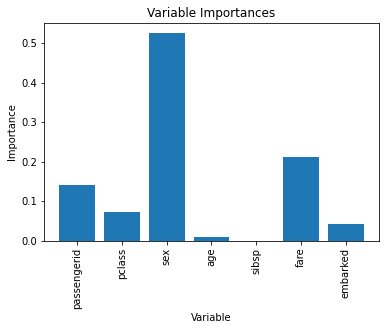

In [72]:
# here we pass in the number of n estimators, minimum sample splits and the maximum depth 
# they are in that order
# we start off with 300, 20, 5
a.rand_tree(300, 20, 5)

by running the random forest classifier we get the most important features as sex, fare, passengerid, pclass, embarked, age in that order of importance.

We will use the above 4 of the most important features in the subsequent models. i.e sex, fare, passengerid and pclass

### Models with most important features only.

In [73]:
# get the independent and dependent variables for the baseline model
X = final[['sex', 'fare', 'passengerid', 'pclass']]
y = final['survived']

#### First model with random test size (important features only)

In [89]:
# generate a random test size for the model
s = np.random.choice([0.2, 0.3, 0.4, 0.5])
print("This run has a test size of", s)
# function call 
k_(X, y, s)

This run has a test size of 0.3
This is the confusin matrix!
 [[110   9]
 [ 21  34]]
This is the classificaion report!
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       119
           1       0.79      0.62      0.69        55

    accuracy                           0.83       174
   macro avg       0.82      0.77      0.79       174
weighted avg       0.82      0.83      0.82       174



At a test size of 0.3 and using 4 of the most important features we have and increase in the precision, recall, accuracy.

#### Second model with random test size (important features only)

In [90]:
# generate a random test size for the model
s = np.random.choice([0.2, 0.3, 0.4, 0.5])
print("This run has a test size of", s)
# function call 
k_(X, y, s)

This run has a test size of 0.3
This is the confusin matrix!
 [[111  12]
 [ 22  29]]
This is the classificaion report!
               precision    recall  f1-score   support

           0       0.83      0.90      0.87       123
           1       0.71      0.57      0.63        51

    accuracy                           0.80       174
   macro avg       0.77      0.74      0.75       174
weighted avg       0.80      0.80      0.80       174



Precision for survived =  1 increases, recall for 0.63 reduces but our f1 scores  drops as well as the accuracy.

### Optimization

In [76]:
# get the parameters that go in a KNN model
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [77]:
# get the independent and dependent variables for the baseline model
X = final[['sex', 'fare', 'passengerid', 'pclass']]
y = final['survived']

# parameters to tune
params = {'metric': ['euclidean', 'manhattan', 'minkowski'], 'leaf_size': list(range(1,20)), 'n_neighbors': list(range(1,20))}

# number of folds
kfold = KFold(n_splits=10, shuffle=True)
model = KNeighborsClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# fitting
search.fit(X, y)

# print out the best parameters
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'leaf_size': 2, 'metric': 'manhattan', 'n_neighbors': 1}


#### Model with best parameters

In [78]:
def k_op(X, y, s):
  # get train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=s)
  
  # standardized data
  scaler = StandardScaler()
  scaler.fit(X_train)

  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  # fit knn
  classifier = KNeighborsClassifier(n_neighbors=1, leaf_size=2, metric='manhattan')
  classifier.fit(X_train, y_train)

  # make predictions
  y_pred = classifier.predict(X_test)
  print("This is the confusin matrix!\n", confusion_matrix(y_test, y_pred))
  print("This is the classificaion report!\n",classification_report(y_test, y_pred))

In [79]:
# get the independent and dependent variables for the baseline model
X = final[['sex', 'fare', 'passengerid', 'pclass']]
y = final['survived']

Random test size 

In [93]:
# generate a random test size for the model
s = np.random.choice([0.2, 0.3, 0.4, 0.5])
print("This run has a test size of", s)
# function call 
k_op(X, y, s)

This run has a test size of 0.2
This is the confusin matrix!
 [[74  7]
 [15 20]]
This is the classificaion report!
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        81
           1       0.74      0.57      0.65        35

    accuracy                           0.81       116
   macro avg       0.79      0.74      0.76       116
weighted avg       0.80      0.81      0.80       116



Compared to the baseline model and the same test size this model underperforms. By studying the classification report we notice that the model is stable. The confusion matrix shows that the data on misclassifications is reduced.

Random test size

In [95]:
# generate a random test size for the model
s = np.random.choice([0.2, 0.3, 0.4, 0.5])
print("This run has a test size of", s)
# function call 
k_op(X, y, s)

This run has a test size of 0.3
This is the confusin matrix!
 [[100  22]
 [ 23  29]]
This is the classificaion report!
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       122
           1       0.57      0.56      0.56        52

    accuracy                           0.74       174
   macro avg       0.69      0.69      0.69       174
weighted avg       0.74      0.74      0.74       174



This is also stable and has lower accuracy than that of the baseline model at a test size of 0.3.

Although the performance did not improve the model did become stable.

There w

## 7. Challenging the solution

To challenge our model we will use another classifier. Here we go with random forest classifier

####Function call

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt

test_features = ['passengerid', 'pclass', 'sex', 'fare']


class trees:
  def __init__(self, X, y, test_features):
    self.X = X
    self.y = y
    self.test_features = test_features
    
  def rand_tree(self, n, s, d):
    # Train using 70% of the data.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


    forest = RandomForestClassifier(n_estimators =n, random_state=42, min_samples_split =s, max_depth=d)
    forest = forest.fit(X_train, y_train)
    tree = DecisionTreeClassifier(max_depth=d)

    # Train it on our training set.
    tree = tree.fit(X_train, y_train)

    # Predict based on the model we've trained, note that we apply it to the whole data set 
    y_pred_tree = tree.predict(X)

    # Predict based on the model we've trained
    y_pred = forest.predict(X_test)
    comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
   # print(comparison_frame.describe())

    # And now we assess the scores
    print('The accuracy score is:', accuracy_score(y_test, y_pred))
    print('The f1 score is:', f1_score(y_test, y_pred))
    def viz(self):
      dot_data = StringIO()
      # pick a specific tree from the forest
      tree = forest.estimators_[50]

      export_graphviz(tree, out_file=dot_data,  
                      filled=True, rounded=True,
                      special_characters=True,feature_names = test_features)
      graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
      graph.write_png('absenteism_forest.png')
      display(Image(graph.create_png()))
    viz(self)
    def imp(self):
      # Get numerical feature importances
      importances = list(tree.feature_importances_)

      # We now use some Python magic to connect each feature with its importance
      # List of tuples with variable and importance
      feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

      print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
      print()

      # Nice to have: We can sort the values in descending order, since we care about the most important features first.
      feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

      # Print out the feature and importances 
      [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

      # list of x locations for plotting
      x_values = list(range(len(importances)))
      # Make a bar chart
      plt.bar(x_values, importances, orientation = 'vertical')
      # Tick labels for x axis
      plt.xticks(x_values, test_features, rotation='vertical')
      # Axis labels and title
      plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
    #imp(self)
 

#### Model 1 (same features as all our KNN models, no standardization)

In [ ]:
# get the independent and dependent variables for the baseline model
# get the independent and dependent variables for the baseline model
X = final[['sex', 'fare', 'passengerid', 'pclass']].values
y = final['survived'].values

In [ ]:
# call the function and pass in the independent and dependt variables
a = trees(X, y, test_features)

In [ ]:
# here we pass in the number of n estimators, minimum sample splits and the maximum depth 
# they are in that order
# we start off with 300, 20, 5
a.rand_tree(300, 20, 5)

Model 2 (same features as all our KNN models, with standardization)

In [ ]:
test_features = ['passengerid', 'pclass', 'sex', 'fare']


class tree1:
  def __init__(self, X, y, test_features):
    self.X = X
    self.y = y
    self.test_features = test_features
    
  def rand_tree(self, n, s, d):
    # Train using 70% of the data.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


    forest = RandomForestClassifier(n_estimators =n, random_state=42, min_samples_split =s, max_depth=d)

        # standardized data
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    forest = forest.fit(X_train, y_train)
    tree = DecisionTreeClassifier(max_depth=d)

    # Train it on our training set.
    tree = tree.fit(X_train, y_train)

    # Predict based on the model we've trained, note that we apply it to the whole data set 
    y_pred_tree = tree.predict(X)

    # Predict based on the model we've trained
    y_pred = forest.predict(X_test)
    comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
   # print(comparison_frame.describe())

    # And now we assess the scores
    print('The accuracy score is:', accuracy_score(y_test, y_pred))
    print('The f1 score is:', f1_score(y_test, y_pred))
    def viz(self):
      dot_data = StringIO()
      # pick a specific tree from the forest
      tree = forest.estimators_[50]

      export_graphviz(tree, out_file=dot_data,  
                      filled=True, rounded=True,
                      special_characters=True,feature_names = test_features)
      graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
      graph.write_png('absenteism_forest.png')
      display(Image(graph.create_png()))
    viz(self)

In [ ]:
# call the function and pass in the independent and dependt variables
a = tree1(X, y, test_features)

In [ ]:
# here we pass in the number of n estimators, minimum sample splits and the maximum depth 
# they are in that order
# we start off with 300, 20, 5
a.rand_tree(300, 20, 5)

Even with stardization the performance does not improve.

## 8. Conclusion

By removing the outliers we lost data in the parch column. 

We observed that most passengers did not survive and the majority of those that did not survive  were men. This could be because females were given priority over males. Then those in the first classes had more of them survive than other classes which could indicate they also received higher priority in the rescue and escape.

The baseline models had accuracies of 0.78 and 0.79. The models with important features performed better than the baseline models. They had an accuracy of 0.84 and 0.87.

With model optimization the accuracy was 0.78 which is lower than the second models but they were more stable than all the other models.

The random forest classifier performed the worst with an accuracy of 0.74.

##9. Recommendations

We recommend that:
1. The parch column be ommitted in removing outliers.
2. Optimization of the random forest classifier.
3. More data about the cabin as most of the data was missing.

##10. Follow up questions

We discovered that the passenger id was important in determining whether a passenger survived or not. Our assumption was that it had no mathematical significance to our analysis. 

We now ask:
1. Why was it important?
2. Would the performance have improved if we had the data for the cabin?
3. How would the models have behaved if we did not remove outliers?